# Datos Climáticos

Datos climaticos obtenidos por API Open Meteo. El periodo de tiempo es del 2013 a 2023. La ubicación es Montevideo y los datos corresponden a un registro por hora. EL punto de referencia es el Aeropuerto Internacional de Carrasco


### Instalación de librerías y lectura de archivo fuente

In [ ]:
!pip install pandas
import pandas as pd
import os

# Ruta local al archivo
desktop_path = os.path.expanduser("~/GitHub/SOLAR_LCOE_UY")
file_path = os.path.join(desktop_path, "data/raw/datos_horarios_con_temeperatura.csv")

# Leer el archivo CSV
data = pd.read_csv(file_path)

print(data.head())

                        date     is_day  temperature  sunshine_duration  \
0  2013-01-01 03:00:00+00:00  22.015001    22.015001                0.0   
1  2013-01-01 04:00:00+00:00  21.215000    21.215000                0.0   
2  2013-01-01 05:00:00+00:00  20.165000    20.165000                0.0   
3  2013-01-01 06:00:00+00:00  19.515001    19.515001                0.0   
4  2013-01-01 07:00:00+00:00  17.815000    17.815000                0.0   

   shortwave_radiation  direct_radiation  terrestrial_radiation  \
0                  0.0               0.0                    0.0   
1                  0.0               0.0                    0.0   
2                  0.0               0.0                    0.0   
3                  0.0               0.0                    0.0   
4                  0.0               0.0                    0.0   

   shortwave_radiation_instant  direct_radiation_instant  \
0                          0.0                       0.0   
1                         

### Aproximación a los datos

In [ ]:
data.tail()

,date,is_day,temperature,sunshine_duration,shortwave_radiation,direct_radiation,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,terrestrial_radiation_instant
96403,2023-12-31 22:00:00+00:00,24.071500,24.071500,1.0,3600.000,227.0,170.0,382.07642,142.31369,106.57854
96404,2023-12-31 23:00:00+00:00,21.671501,21.671501,0.0,1737.243,45.0,25.0,108.55969,0.00000,0.00000
96405,2024-01-01 00:00:00+00:00,20.521502,20.521502,0.0,0.000,0.0,0.0,0.00000,0.00000,0.00000
96406,2024-01-01 01:00:00+00:00,20.571500,20.571500,0.0,0.000,0.0,0.0,0.00000,0.00000,0.00000
96407,2024-01-01 02:00:00+00:00,20.021502,20.021502,0.0,0.000,0.0,0.0,0.00000,0.00000,0.00000


In [ ]:
data.describe()

,is_day,temperature,sunshine_duration,shortwave_radiation,direct_radiation,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,terrestrial_radiation_instant
count,96408.000000,96408.000000,96408.000000,96408.000000,96408.000000,96408.000000,96408.000000,96408.00000,96408.000000
mean,17.402981,17.402981,0.502375,1325.705045,198.196830,138.381141,358.086558,197.56824,138.086455
std,6.428090,6.428090,0.499997,1682.279879,286.147133,234.432414,445.870773,287.69399,235.626810
min,-1.578500,-1.578500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,12.771500,12.771500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,17.415000,17.415000,1.000000,0.000000,8.000000,0.000000,55.974858,0.00000,0.000000
75%,21.971500,21.971500,1.000000,3600.000000,352.000000,195.000000,723.915475,349.04023,193.462905
max,39.721500,39.721500,1.000000,3600.000000,1128.000000,1021.000000,1389.080300,1131.89660,1020.525270


## Generación de gráficos
### Análisis de radiación

Histograma para cada tipo de variable (radiación, es día, etc)

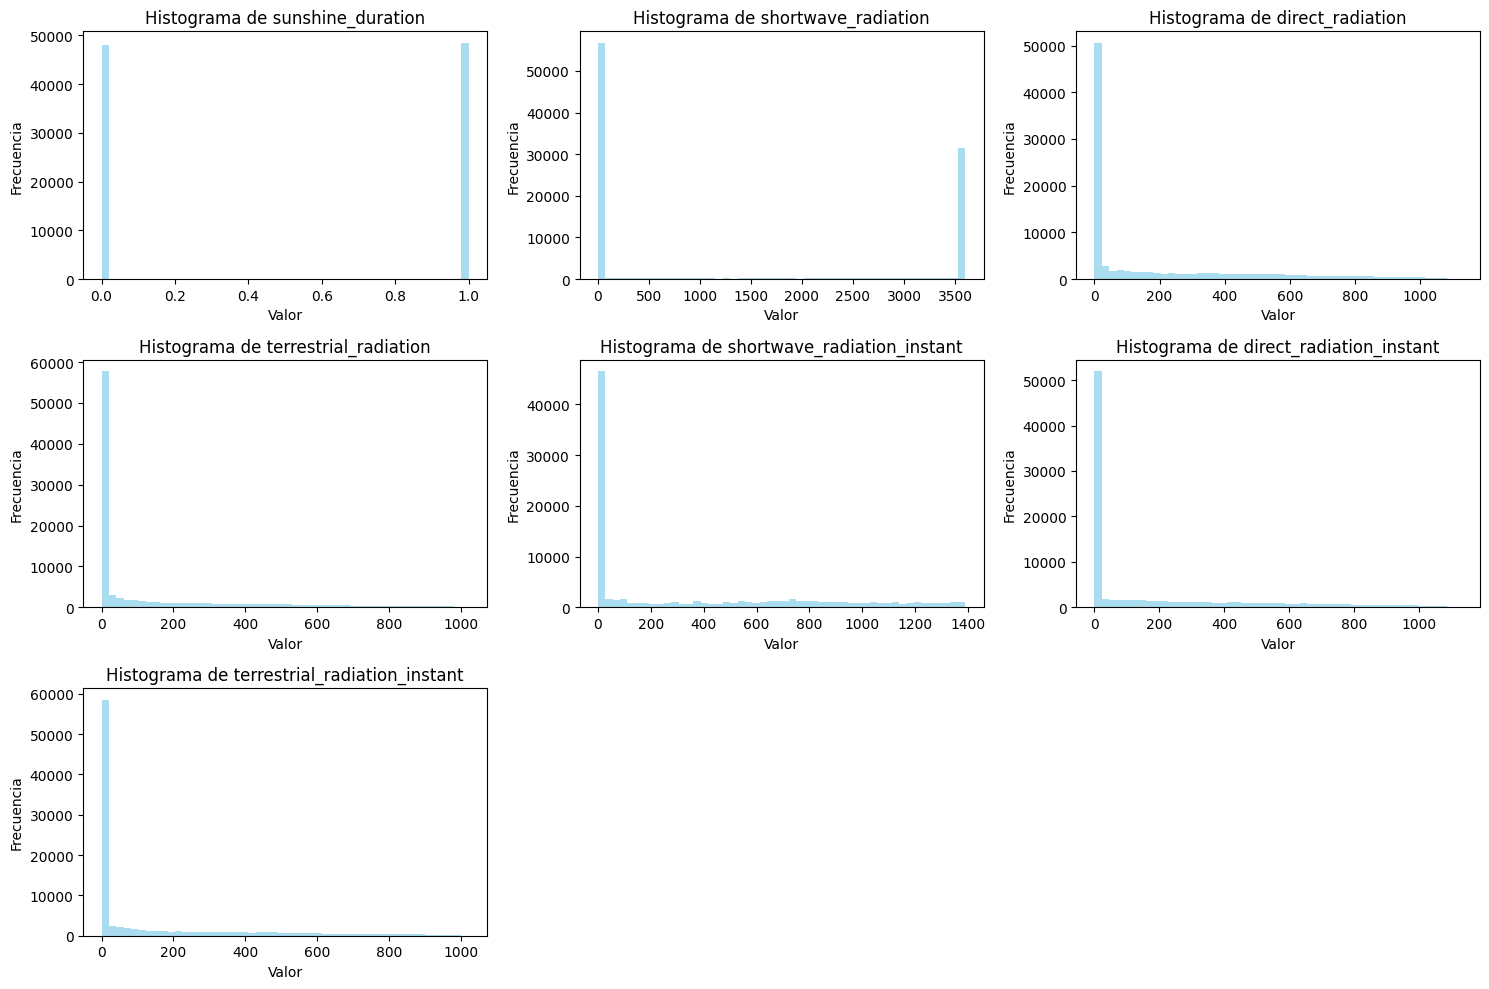

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Lista de columnas para las cuales generar histogramas
columns = ['sunshine_duration', 'shortwave_radiation', 'direct_radiation', 'terrestrial_radiation',
           'shortwave_radiation_instant', 'direct_radiation_instant', 'terrestrial_radiation_instant']

# Configuración de la visualización
plt.figure(figsize=(15, 10))

# Bucle para generar un histograma para cada columna
for i, column in enumerate(columns):
    plt.subplot(3, 3, i+1)  # Ajustar la grilla de subplots según necesidad
    plt.hist(data[column], bins=50, color='skyblue', alpha=0.7)
    plt.title(f'Histograma de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajusta automáticamente los subplots para que encajen en el área de la figura
plt.show()


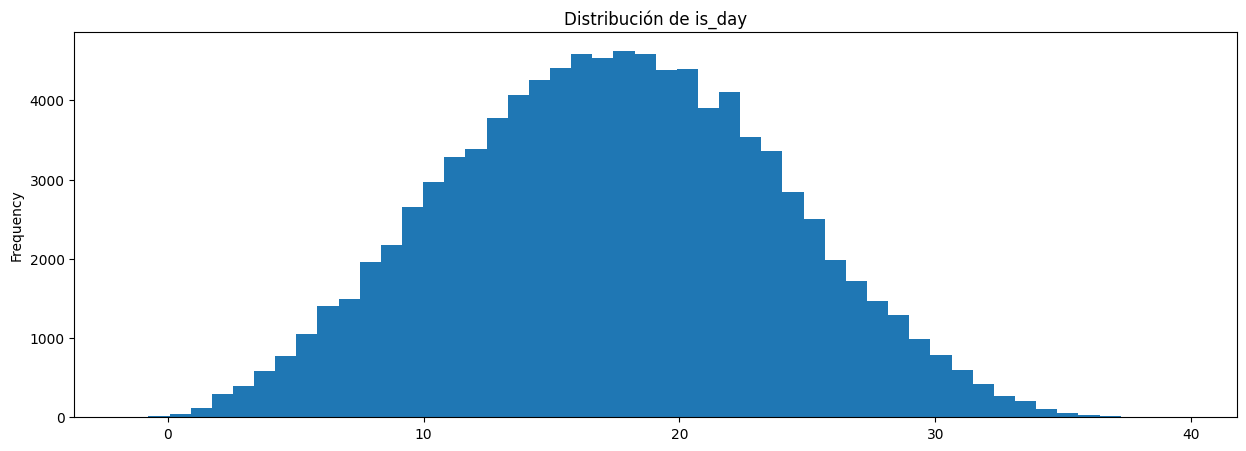

In [ ]:
# Histograma para 'is_day'
_ = data['is_day'].plot.hist(figsize=(15, 5), bins=50, title='Distribución de is_day')


Este histograma muestra la distribución de la variable is_day, que parece representar la temperatura durante el día. Se observa una concentración alrededor de los 17 °C, lo que sugiere temperaturas promedio moderadas.



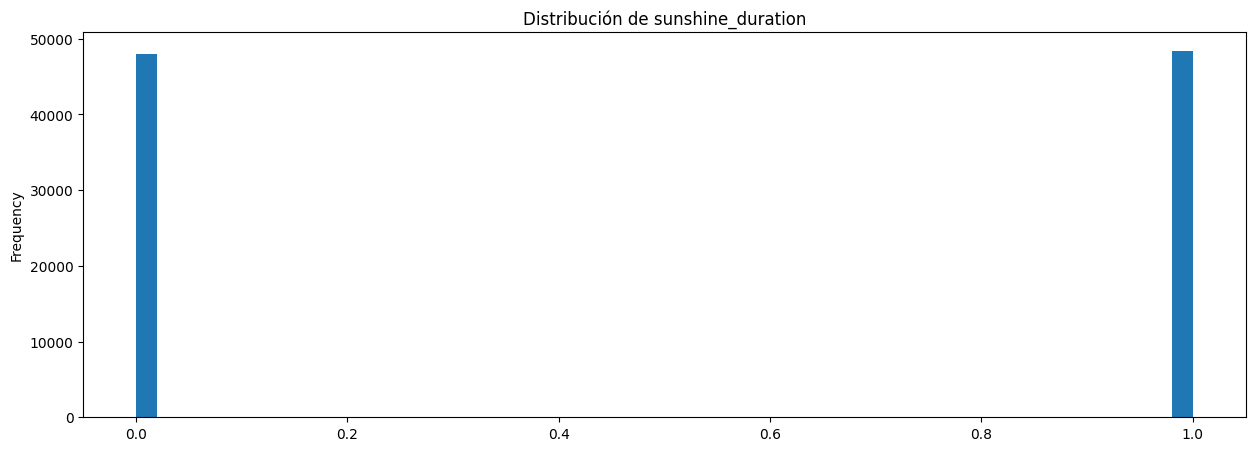

In [ ]:
# Histograma para 'sunshine_duration'
_ = data['sunshine_duration'].plot.hist(figsize=(15, 5), bins=50, title='Distribución de sunshine_duration')


La mayoría de los registros tienen duración de sol igual a 0, lo que indica muchas horas sin radiación solar directa, probablemente por registros nocturnos o cielos nublados.

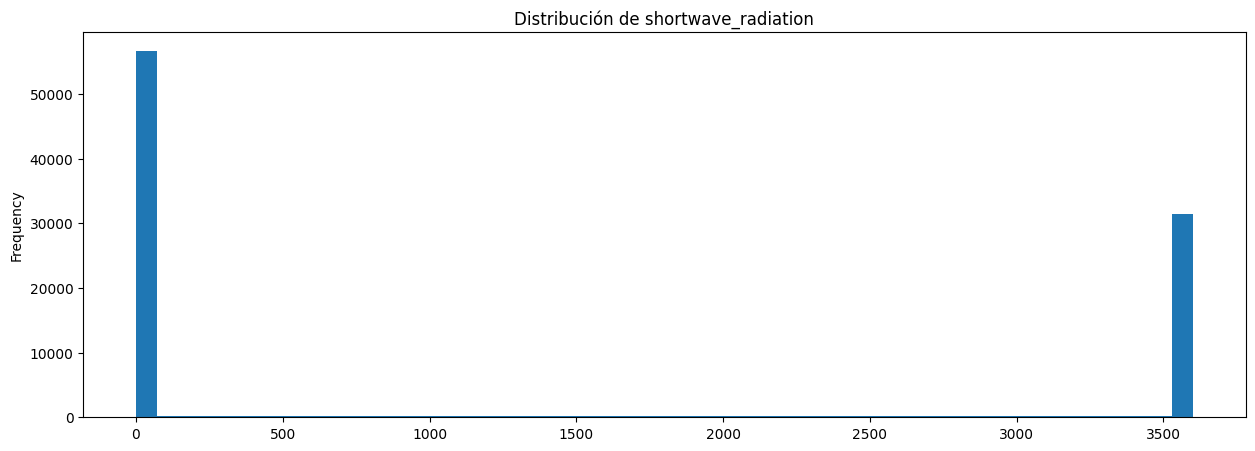

In [ ]:
# Histograma para 'shortwave_radiation'
_ = data['shortwave_radiation'].plot.hist(figsize=(15, 5), bins=50, title='Distribución de shortwave_radiation')


Este histograma muestra una fuerte concentración en valores bajos y algunos picos altos aislados. Esto sugiere que la radiación de onda corta solo es significativa en momentos puntuales del día y del año.

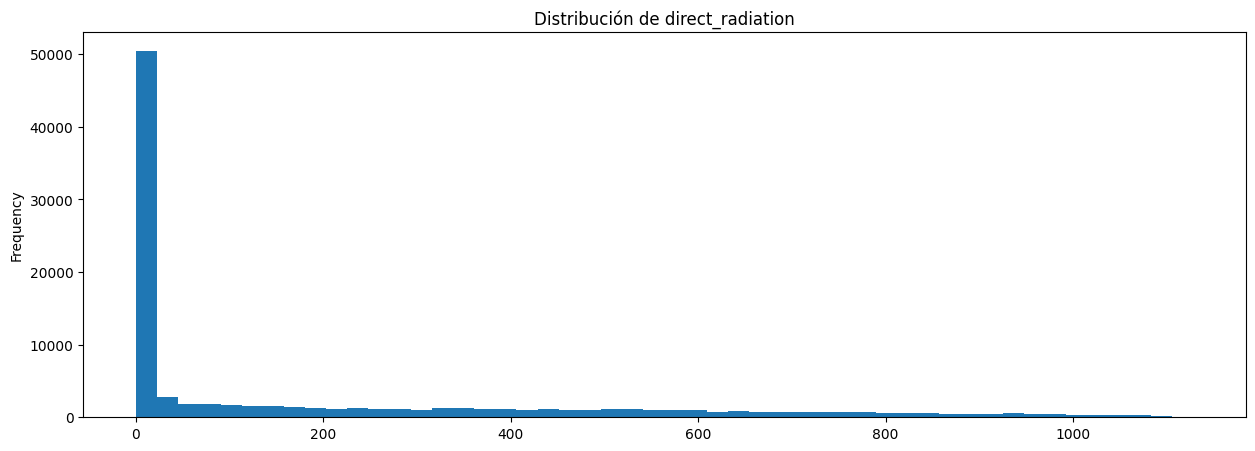

In [ ]:
### Histograma para 'direct_radiation'
_ = data['direct_radiation'].plot.hist(figsize=(15, 5), bins=50, title='Distribución de direct_radiation')


La radiación directa también se presenta con muchos valores nulos o bajos, reflejando que en la mayoría de las horas del año no hay incidencia directa de los rayos solares (noche o nubosidad).

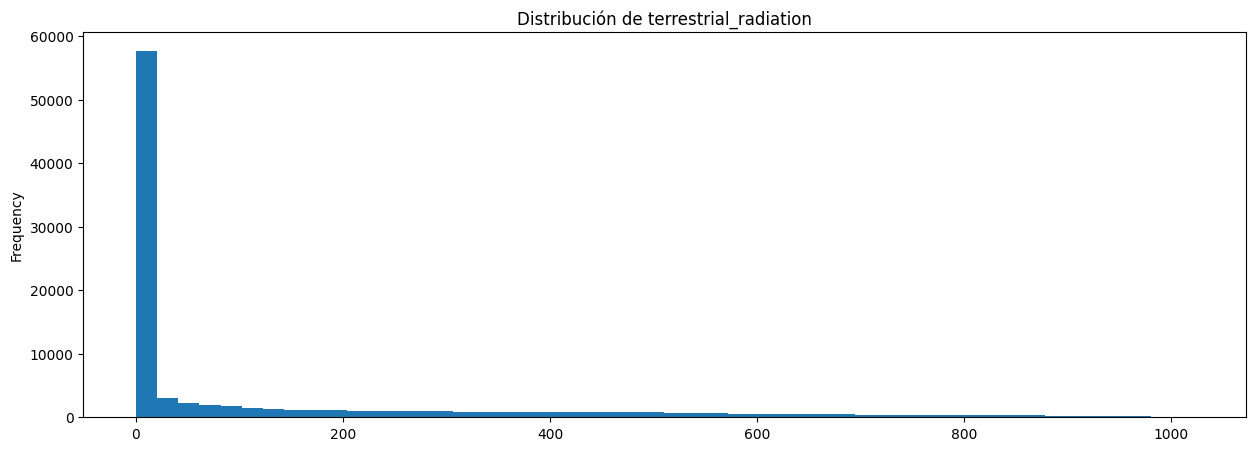

In [ ]:
# Histograma para 'terrestrial_radiation'
_ = data['terrestrial_radiation'].plot.hist(figsize=(15, 5), bins=50, title='Distribución de terrestrial_radiation')


La radiación terrestre muestra una distribución bimodal: una gran cantidad de valores bajos y otra porción en niveles más altos. Esto puede deberse a variaciones térmicas diurnas/nocturnas o estacionales.

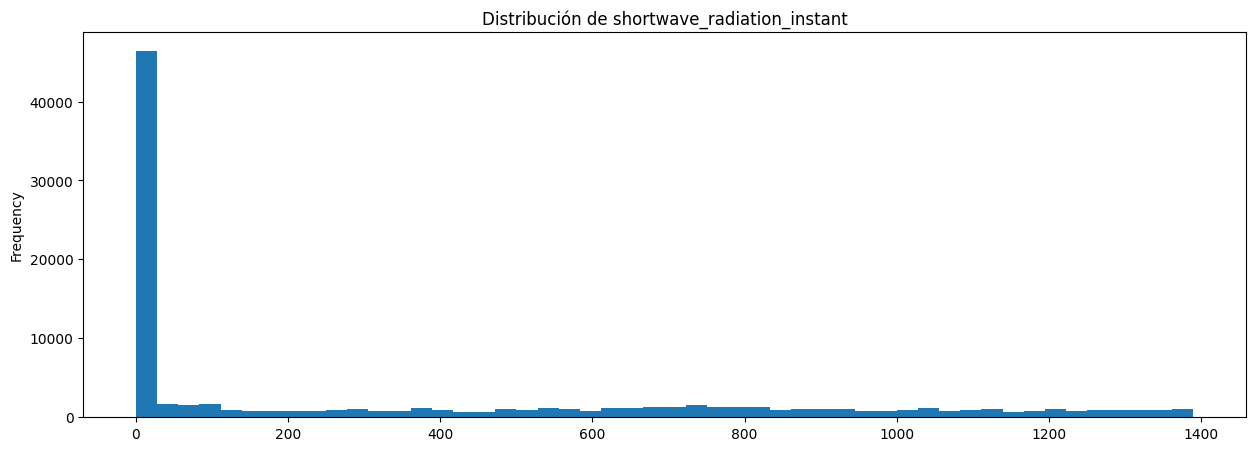

In [ ]:
# Histograma para 'shortwave_radiation_instant'
_ = data['shortwave_radiation_instant'].plot.hist(figsize=(15, 5), bins=50, title='Distribución de shortwave_radiation_instant')


Predomina el valor cero, pero hay una cola hacia valores altos. Esto indica que la radiación instantánea de onda corta ocurre de forma puntual, principalmente en las horas de mayor insolación.

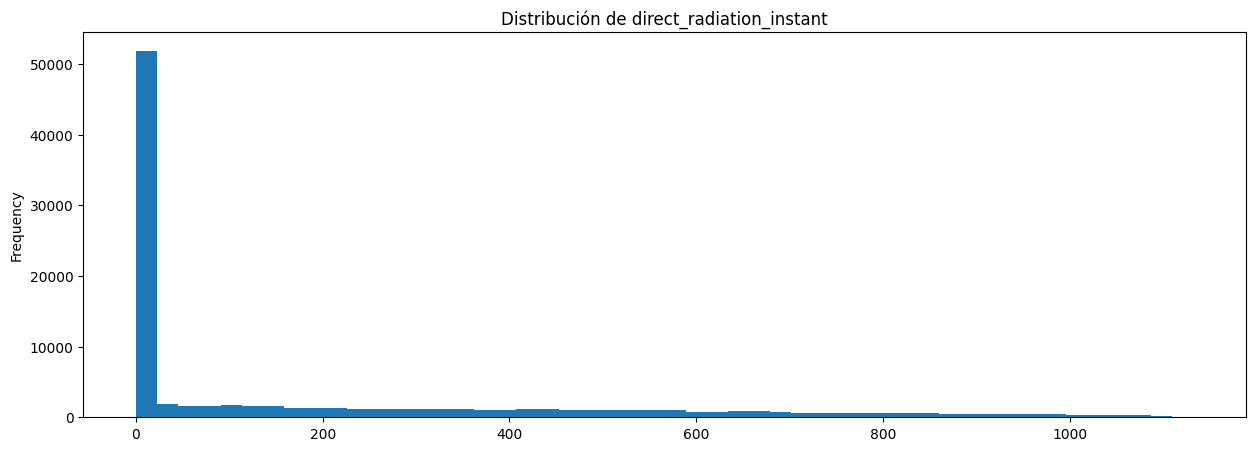

In [ ]:
# Histograma para 'direct_radiation_instant'
_ = data['direct_radiation_instant'].plot.hist(figsize=(15, 5), bins=50, title='Distribución de direct_radiation_instant')


La mayoría de las observaciones son cero, con algunos valores muy altos. Esto refleja la variabilidad de la radiación directa instantánea, influida fuertemente por la presencia del sol y las condiciones atmosféricas.

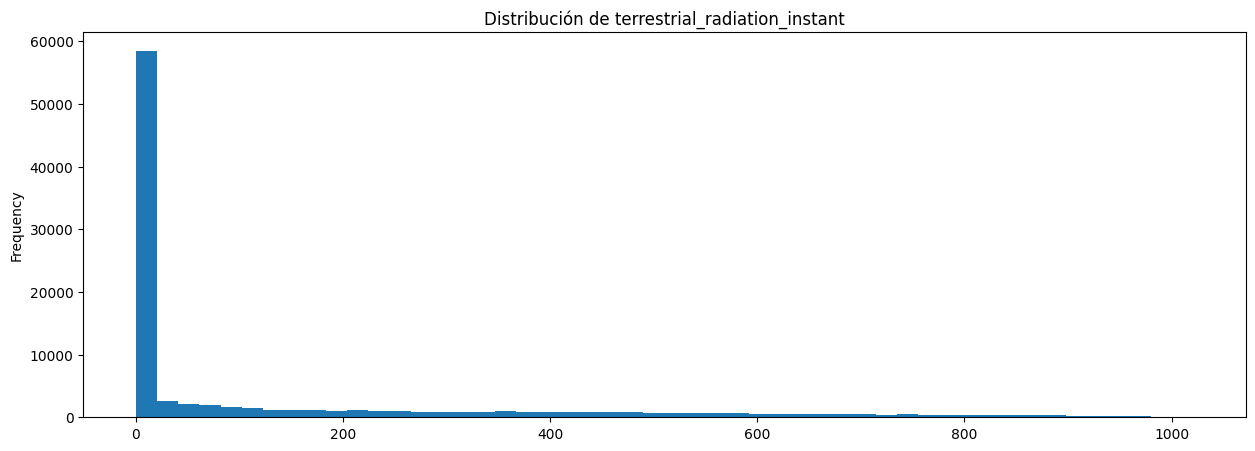

In [ ]:
# Histograma para 'terrestrial_radiation_instant'
_ = data['terrestrial_radiation_instant'].plot.hist(figsize=(15, 5), bins=50, title='Distribución de terrestrial_radiation_instant')


La radiación instantánea terrestre sigue un patrón similar al de la directa: valores mayoritariamente nulos y un pequeño grupo con valores elevados, posiblemente durante el día o en noches cálidas.



Creación de la variable estación según los mese del año

In [ ]:
# Convierte columna 'date' a datetime para extraer información de datos de tiempo
data['date'] = pd.to_datetime(data['date'])

# Función que obtiee la temporada estival según el mes
def get_season(month):
    if month in [12, 1, 2]:
        return 'Verano'  # Diciembre, Enero, Febrero
    elif month in [3, 4, 5]:
        return 'Otoño'  # Marzo, Abril, Mayo
    elif month in [6, 7, 8]:
        return 'Invierno'  # Junio, Julio, Agosto
    elif month in [9, 10, 11]:
        return 'Primavera'  # Septiembre, Octubre, Noviembre

# Crea una nueva columna 'season' basada en el mes extraído de 'date'
data['season'] = data['date'].dt.month.apply(get_season)

# Muestra los valores únicos para confirmar la nueva variable llamada season
data[['date', 'season']].head(), data['season'].unique()


(                       date  season
 0 2013-01-01 03:00:00+00:00  Verano
 1 2013-01-01 04:00:00+00:00  Verano
 2 2013-01-01 05:00:00+00:00  Verano
 3 2013-01-01 06:00:00+00:00  Verano
 4 2013-01-01 07:00:00+00:00  Verano,
 array(['Verano', 'Otoño', 'Invierno', 'Primavera'], dtype=object))

In [ ]:
data.head()

,date,is_day,temperature,sunshine_duration,shortwave_radiation,direct_radiation,terrestrial_radiation,shortwave_radiation_instant,direct_radiation_instant,terrestrial_radiation_instant,season
0,2013-01-01 03:00:00+00:00,22.015001,22.015001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Verano
1,2013-01-01 04:00:00+00:00,21.215000,21.215000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Verano
2,2013-01-01 05:00:00+00:00,20.165000,20.165000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Verano
3,2013-01-01 06:00:00+00:00,19.515001,19.515001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Verano
4,2013-01-01 07:00:00+00:00,17.815000,17.815000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Verano


## Temporalidad de las variables

### Por estación, año, mes, semana y día

Promedio de radiación por estación y por año

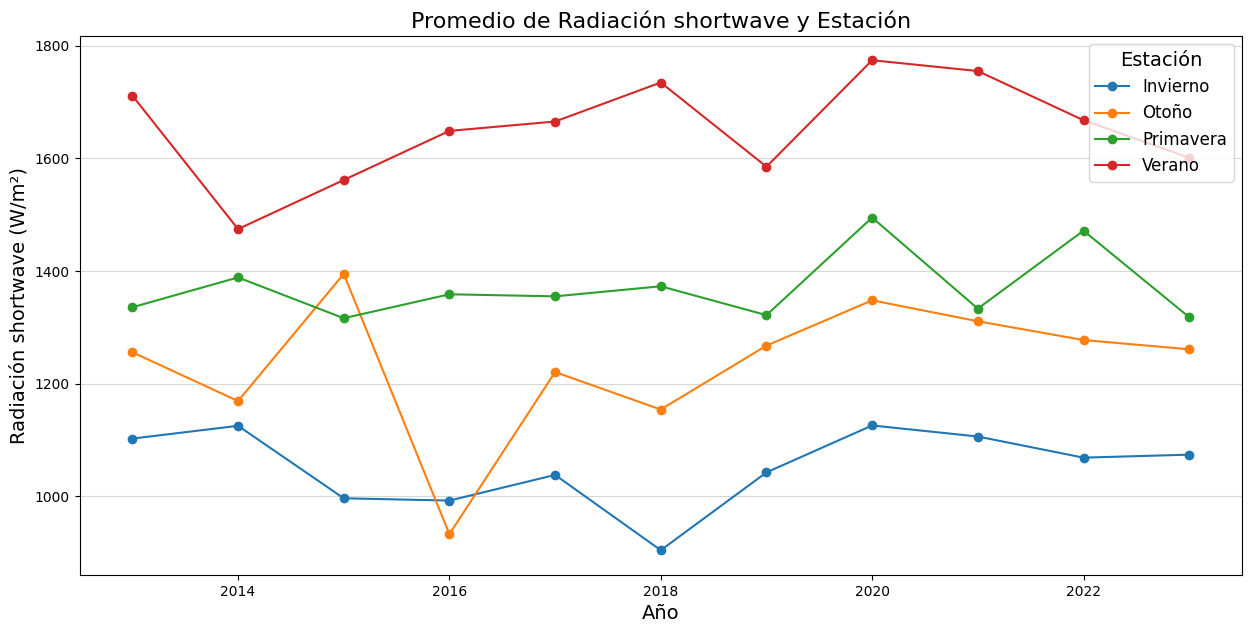

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Extrae el año desde la columna 'date'
data['year'] = data['date'].dt.year

# Crea una nueva tabla pivot para summarizar  el promedio de radiación por esatación de tiempo y año
radiation_by_year_season = data.pivot_table(
    values='shortwave_radiation',
    index='year',
    columns='season',
    aggfunc='mean'
)
radiation_by_year_season = radiation_by_year_season[radiation_by_year_season.index != 2024]
# Grafica los datos
plt.figure(figsize=(15, 7))
radiation_by_year_season.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Promedio de Radiación shortwave y Estación', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Radiación shortwave (W/m²)', fontsize=14)
plt.legend(title='Estación', fontsize=12, title_fontsize=14)
plt.grid(True, axis='y', alpha=0.5)

plt.show()


### Se filtra sólo para el año 2020 para ver sus datos

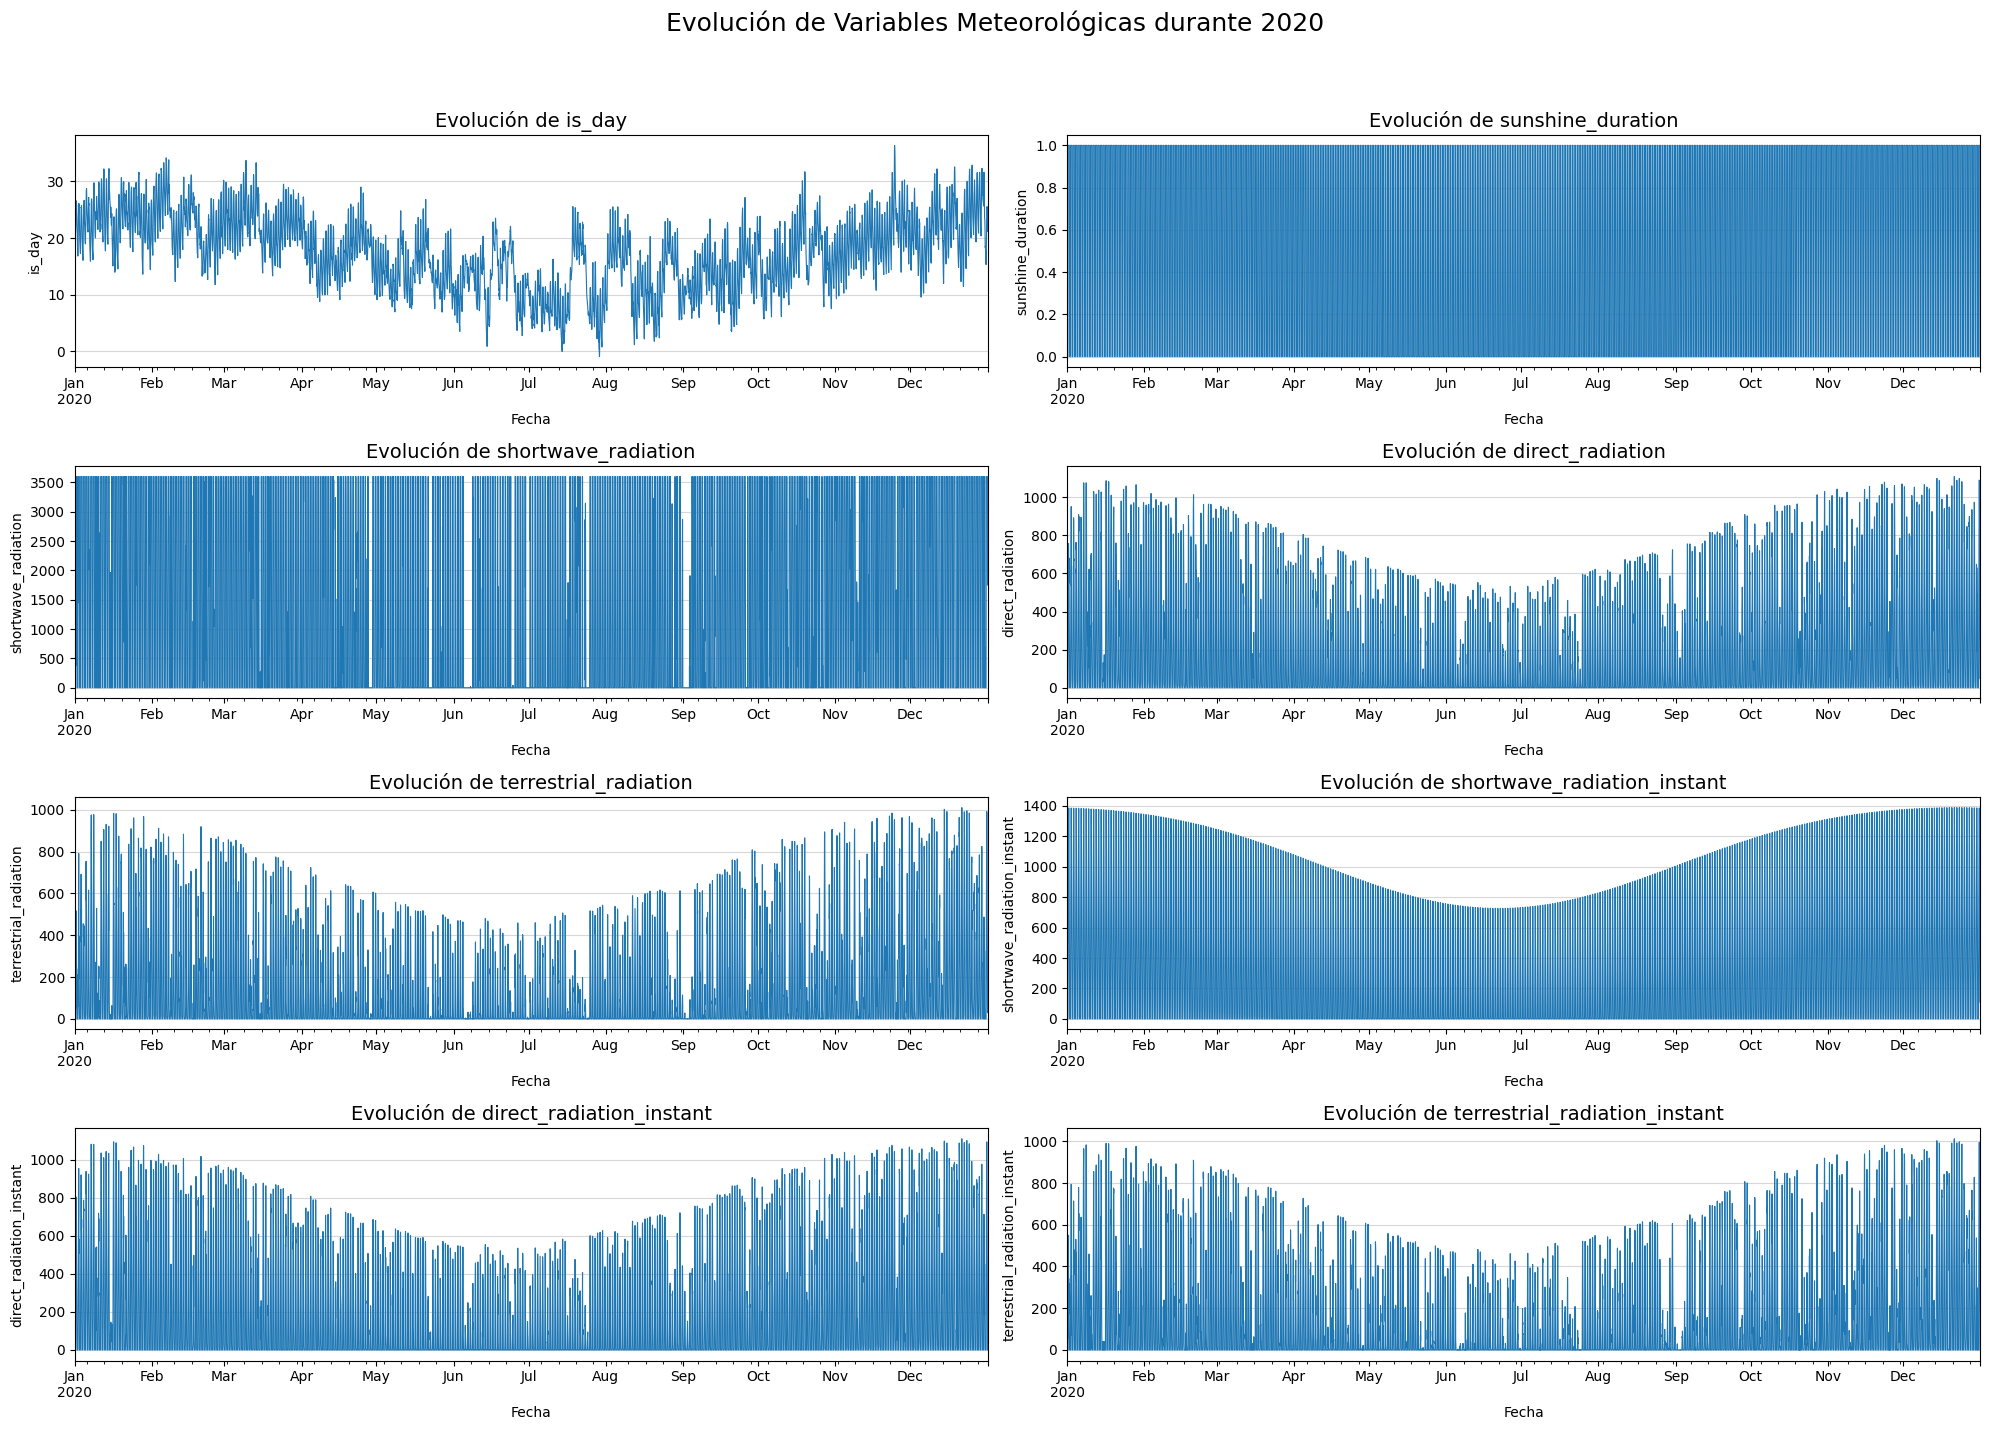

In [ ]:
# Filtra los datos para el año 2020
data_2020 = data[data['year'] == 2020]

# Grafica cada variable sobre los datos del 2020
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
fig.suptitle('Evolución de Variables Meteorológicas durante 2020', fontsize=18)

# Lista de variables a graficar
variables = [
    'is_day', 'sunshine_duration', 'shortwave_radiation', 'direct_radiation',
    'terrestrial_radiation', 'shortwave_radiation_instant',
    'direct_radiation_instant', 'terrestrial_radiation_instant'
]

# Grafica cada variable en un subplot
for i, var in enumerate(variables):
    ax = axes[i // 2, i % 2]  # Determina la posición del subplot
    data_2020.plot(x='date', y=var, ax=ax, legend=False, linewidth=0.8)
    ax.set_title(f'Evolución de {var}', fontsize=14)
    ax.set_xlabel('Fecha')
    ax.set_ylabel(var)
    ax.grid(True, axis='y', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Estudio en un mes de un año en particular.  
Se filtra para Octubre 2019

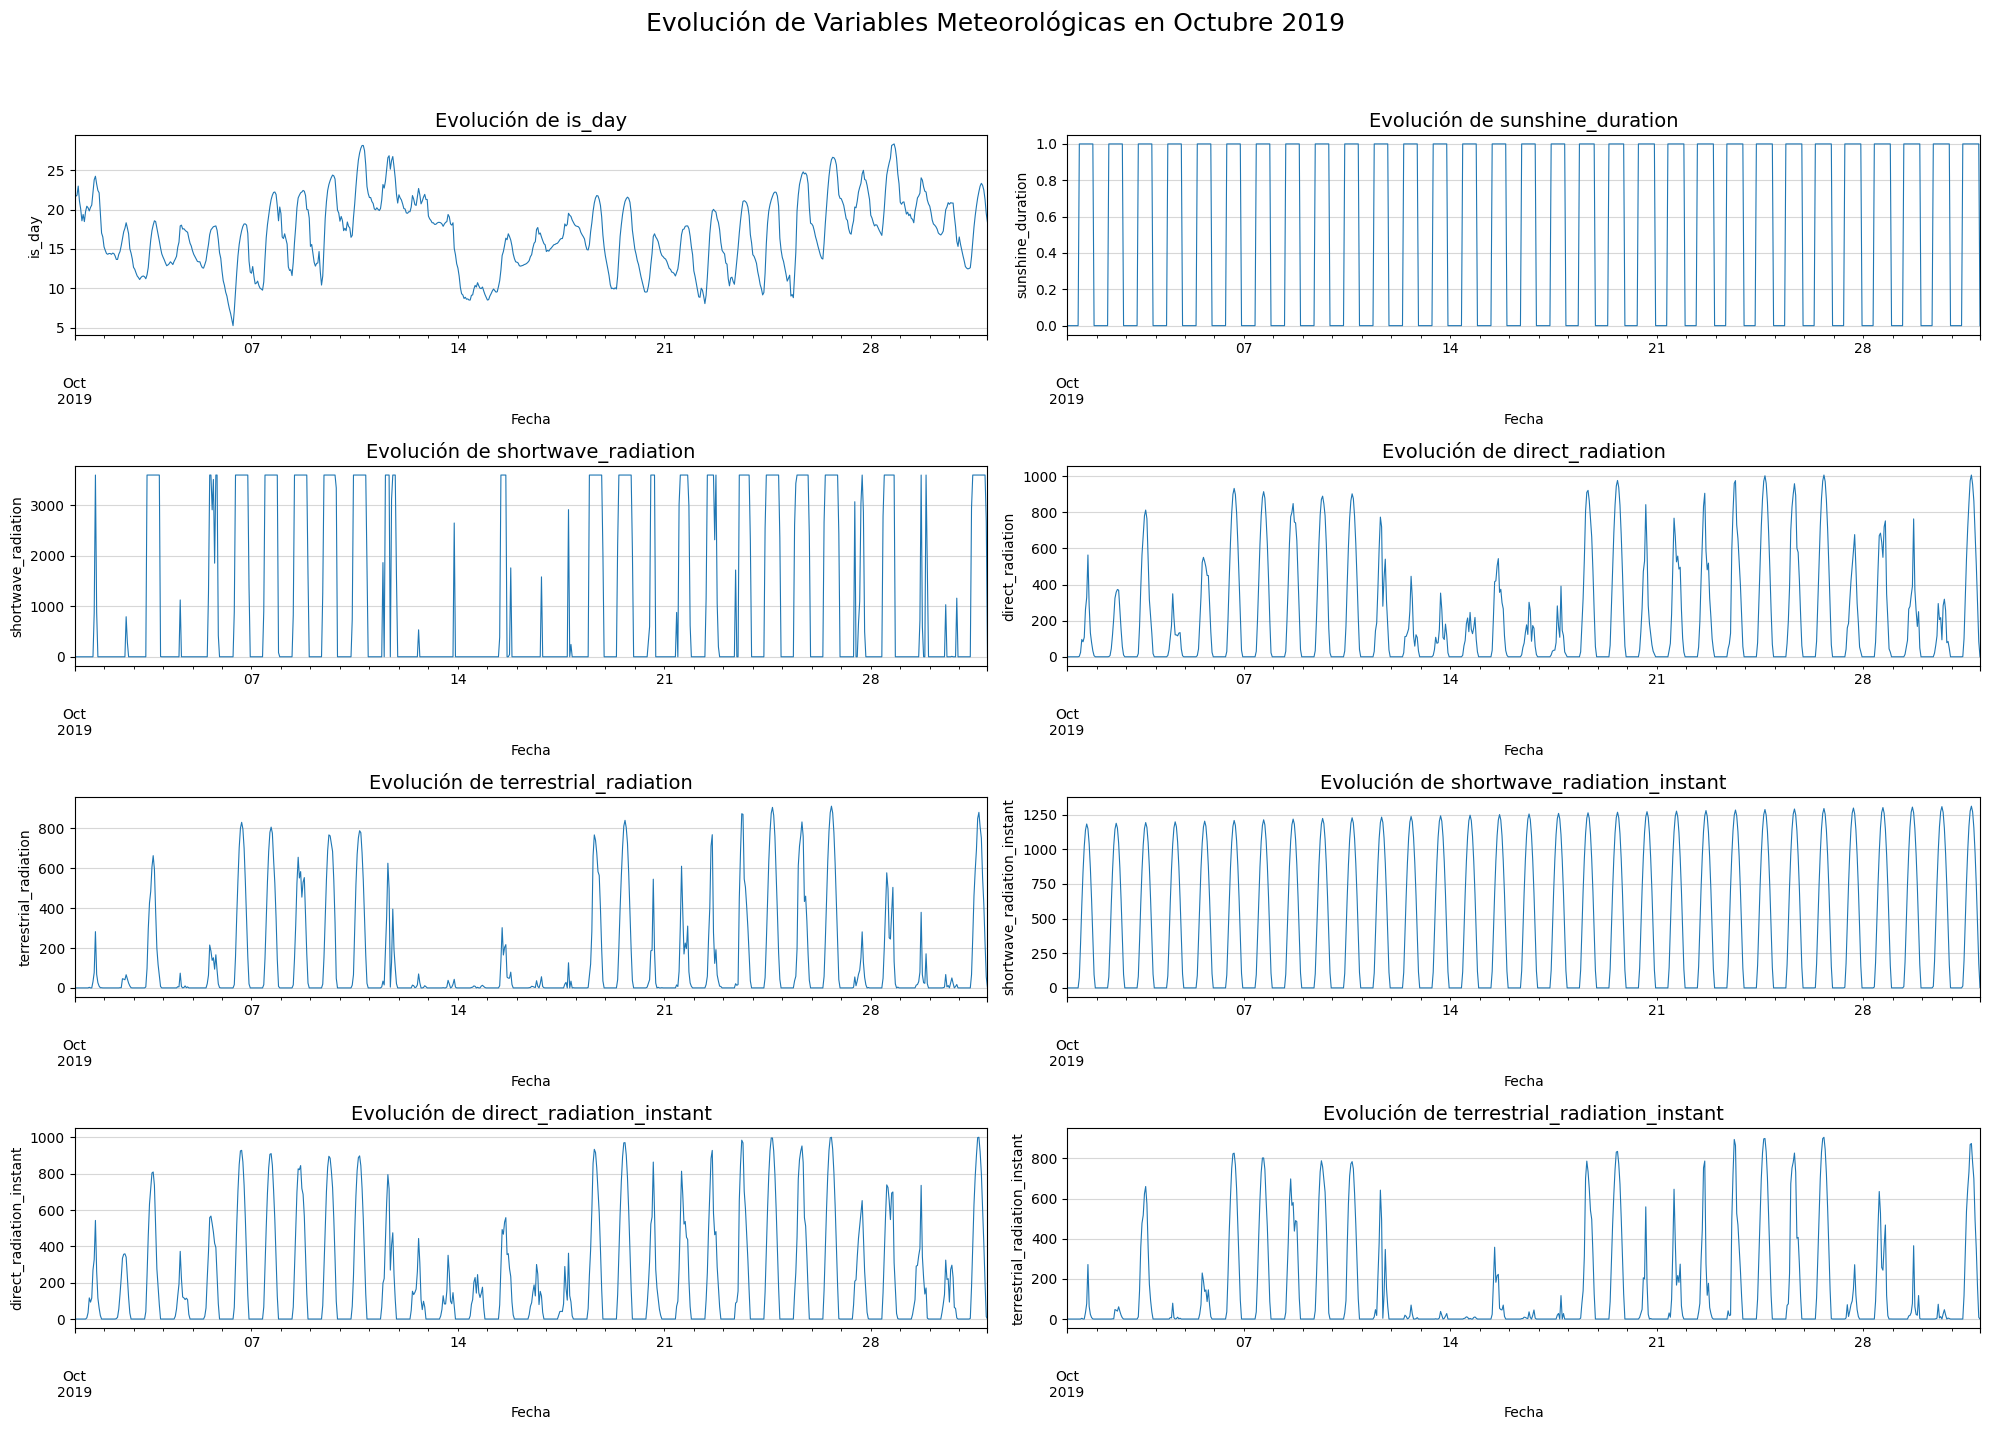

In [ ]:
# Filtra datos para Octubre 2019
data_oct_2019 = data[(data['year'] == 2019) & (data['date'].dt.month == 10)]

# Grafica cada variable sobre Octubre 2019
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
fig.suptitle('Evolución de Variables Meteorológicas en Octubre 2019', fontsize=18)

# Lista de variables a graficar
variables = [
    'is_day', 'sunshine_duration', 'shortwave_radiation', 'direct_radiation',
    'terrestrial_radiation', 'shortwave_radiation_instant',
    'direct_radiation_instant', 'terrestrial_radiation_instant'
]

# Grafica cada variable en un subplot
for i, var in enumerate(variables):
    ax = axes[i // 2, i % 2]  # Determina la posición del subplot
    data_oct_2019.plot(x='date', y=var, ax=ax, legend=False, linewidth=0.8)
    ax.set_title(f'Evolución de {var}', fontsize=14)
    ax.set_xlabel('Fecha')
    ax.set_ylabel(var)
    ax.grid(True, axis='y', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Se filtra por una semana en específico
La elección es del 16 de julio de 2022 al 22 de julio de 2022

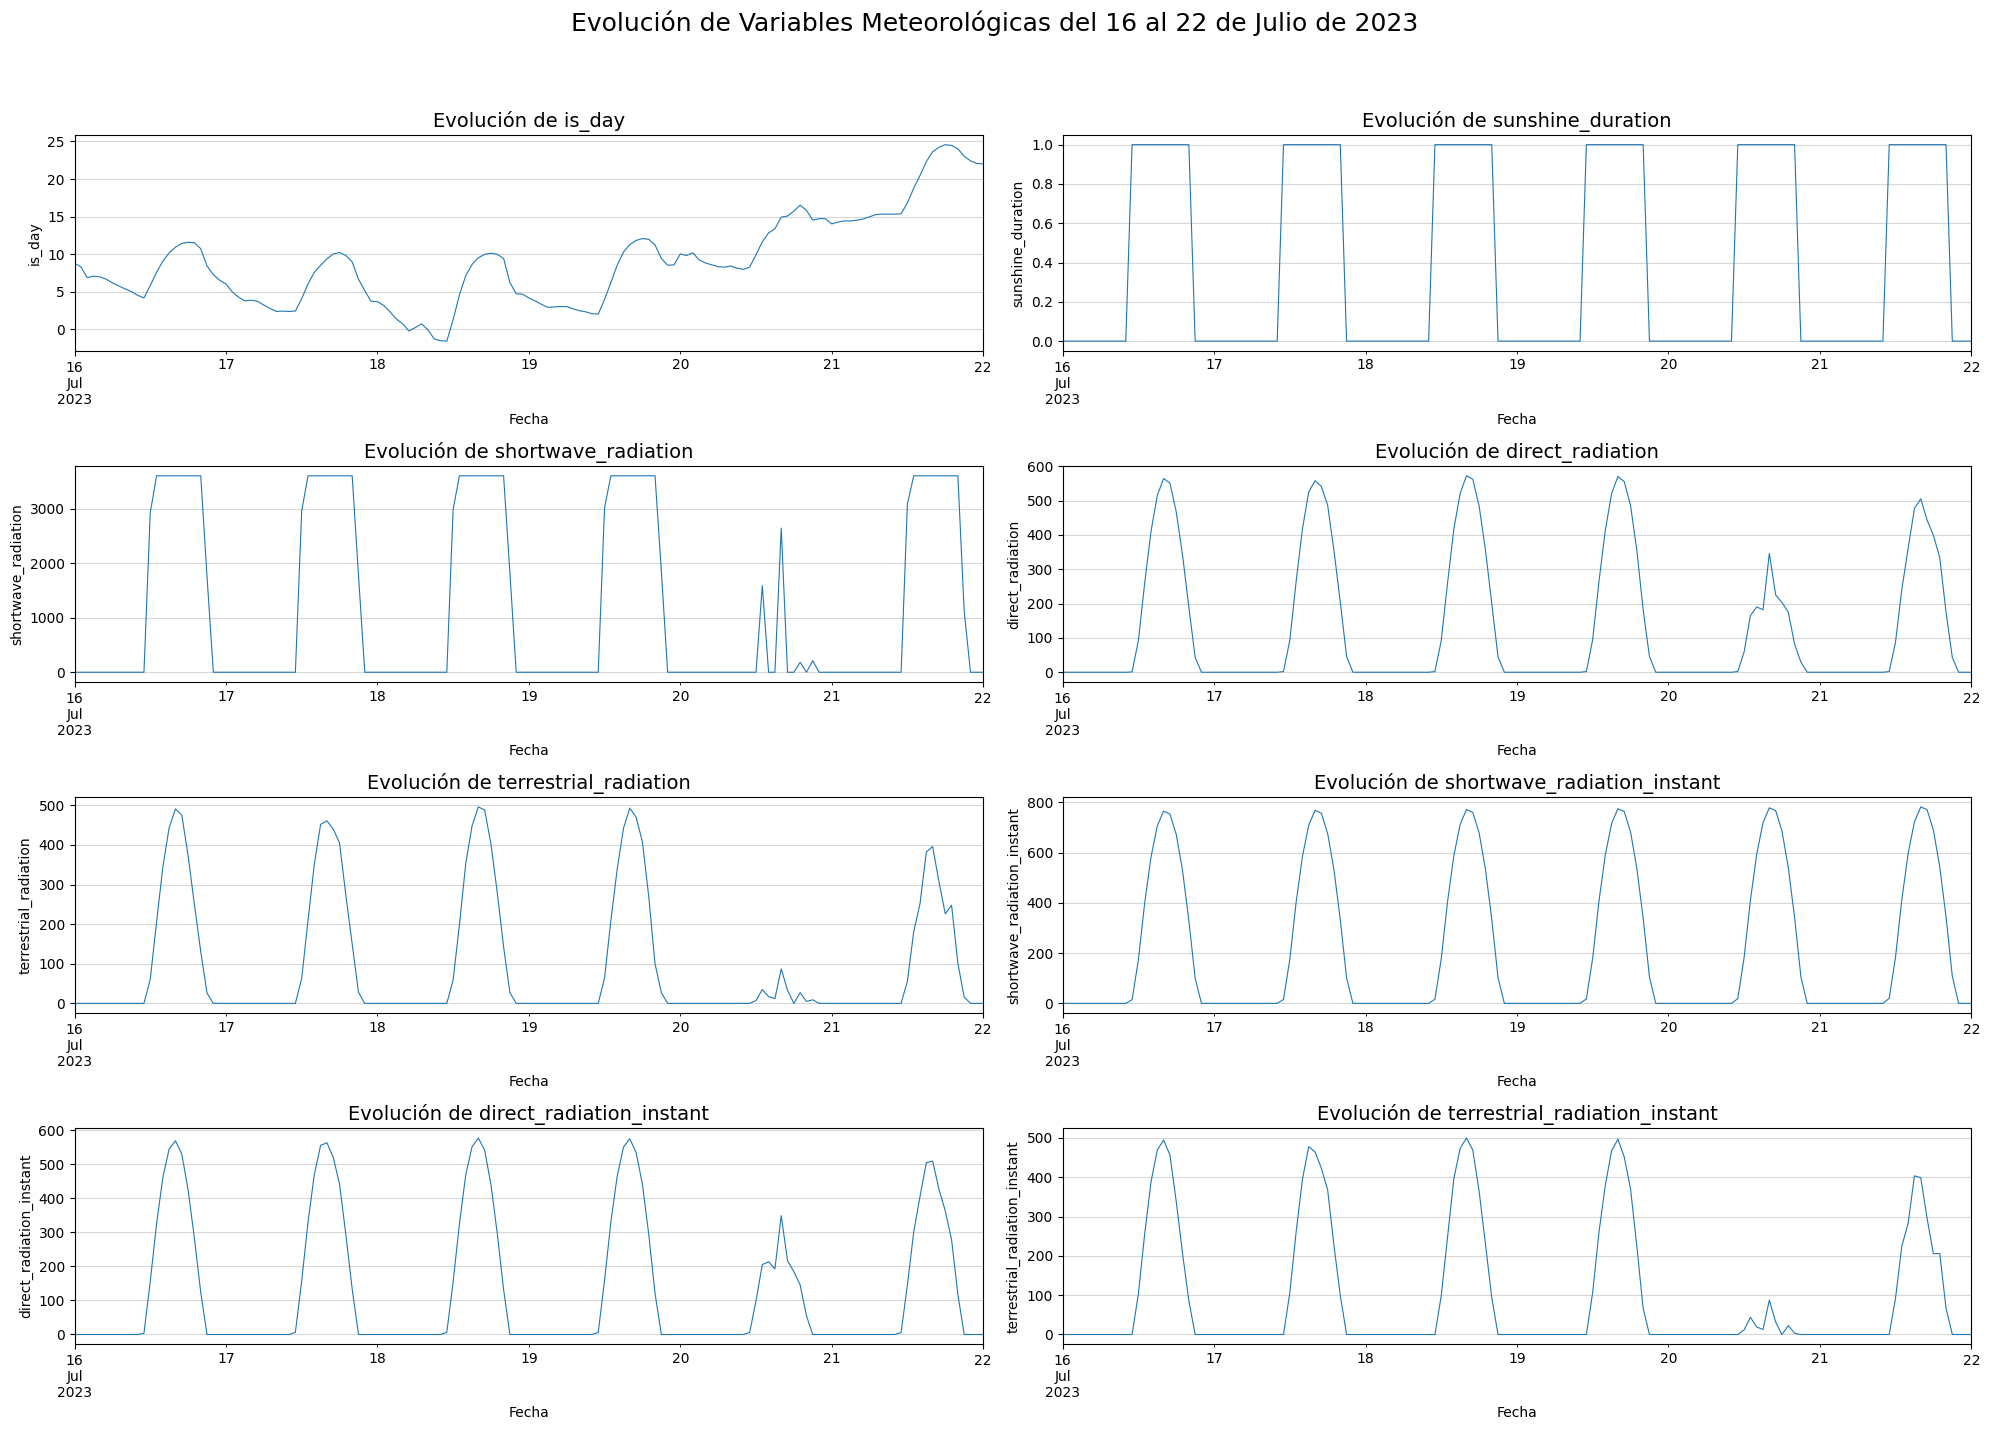

In [ ]:
# Filtra la data por una semana en específico: Domingo a Sábado en Julio 2023
data_july_week = data[(data['date'] >= '2023-07-16') & (data['date'] <= '2023-07-22')]

#Grafica cada variable en base a la semana filtrada
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
fig.suptitle('Evolución de Variables Meteorológicas del 16 al 22 de Julio de 2023', fontsize=18)

# Lista de variables oara graficar
variables = [
    'is_day', 'sunshine_duration', 'shortwave_radiation', 'direct_radiation',
    'terrestrial_radiation', 'shortwave_radiation_instant',
    'direct_radiation_instant', 'terrestrial_radiation_instant'
]

# Grafica cada variable en un subplot
for i, var in enumerate(variables):
    ax = axes[i // 2, i % 2]  # Determina la posición del subplot
    data_july_week.plot(x='date', y=var, ax=ax, legend=False, linewidth=0.8)
    ax.set_title(f'Evolución de {var}', fontsize=14)
    ax.set_xlabel('Fecha')
    ax.set_ylabel(var)
    ax.grid(True, axis='y', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Se decide estudiar un día en específico
Año elegido: 23 de diciembre de 2021

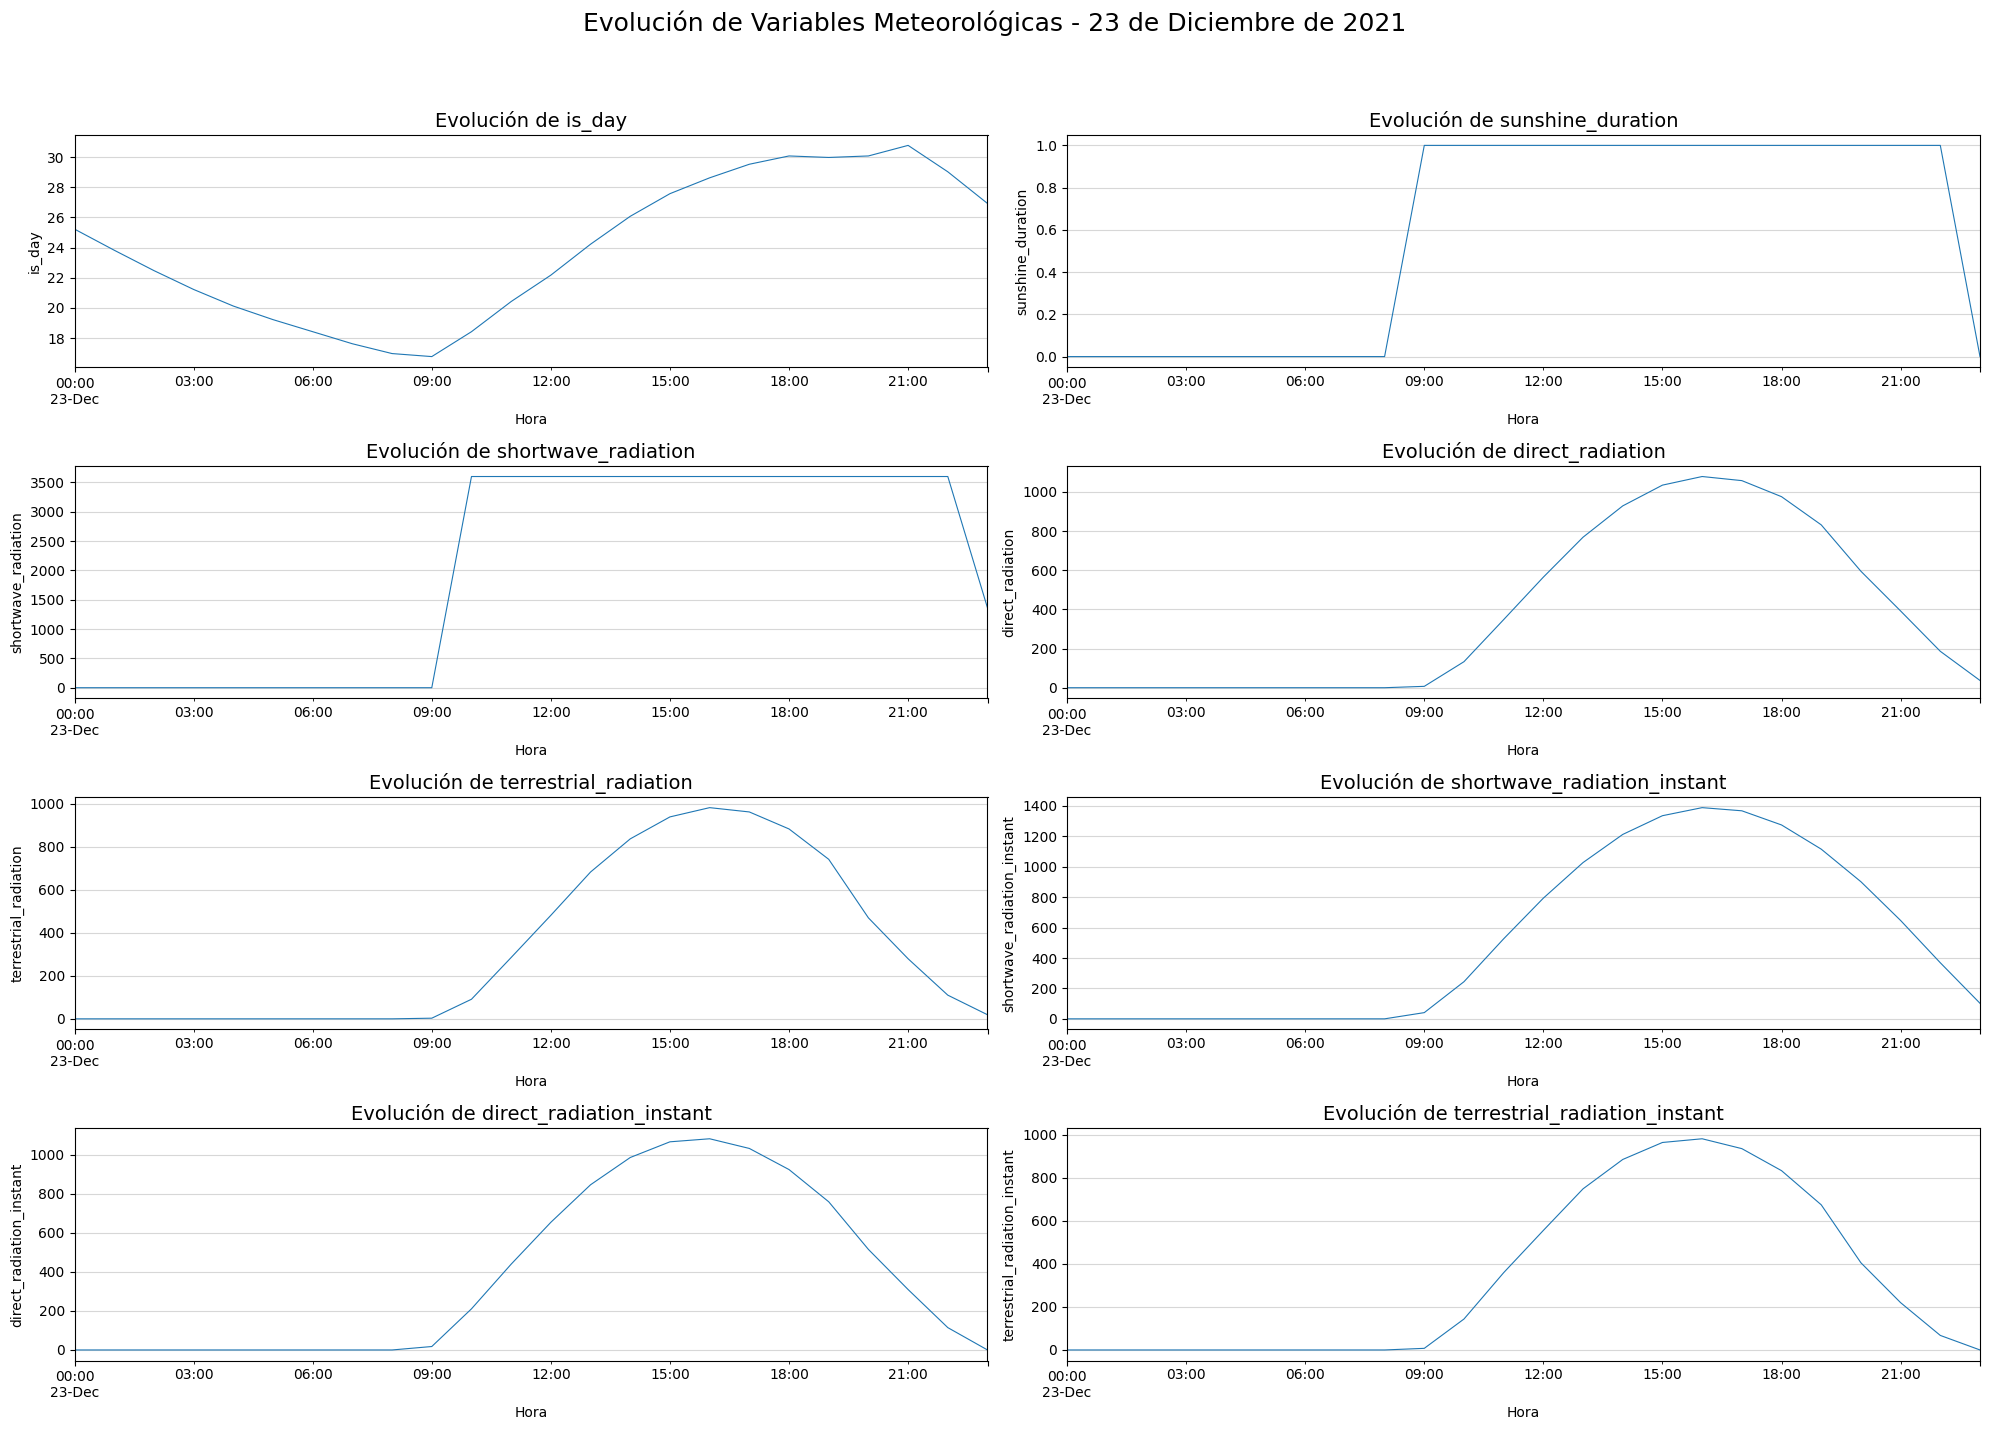

In [ ]:
# Filtra los datos para un día en específico: 23 de Diciembre de 2021
data_dec_23_2021 = data[(data['date'].dt.date == pd.to_datetime('2021-12-23').date())]

# Grafica cada variable para ese día
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
fig.suptitle('Evolución de Variables Meteorológicas - 23 de Diciembre de 2021', fontsize=18)

# Lista de variables a graficar
variables = [
    'is_day', 'sunshine_duration', 'shortwave_radiation', 'direct_radiation',
    'terrestrial_radiation', 'shortwave_radiation_instant',
    'direct_radiation_instant', 'terrestrial_radiation_instant'
]

# Grafica cada variable en un subplot
for i, var in enumerate(variables):
    ax = axes[i // 2, i % 2]  # Determina la posición del subplot
    data_dec_23_2021.plot(x='date', y=var, ax=ax, legend=False, linewidth=0.8)
    ax.set_title(f'Evolución de {var}', fontsize=14)
    ax.set_xlabel('Hora')
    ax.set_ylabel(var)
    ax.grid(True, axis='y', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Uso de tabla pivot:
Visualizar valores minimos y maximos de las diferentes variables por año y por estación

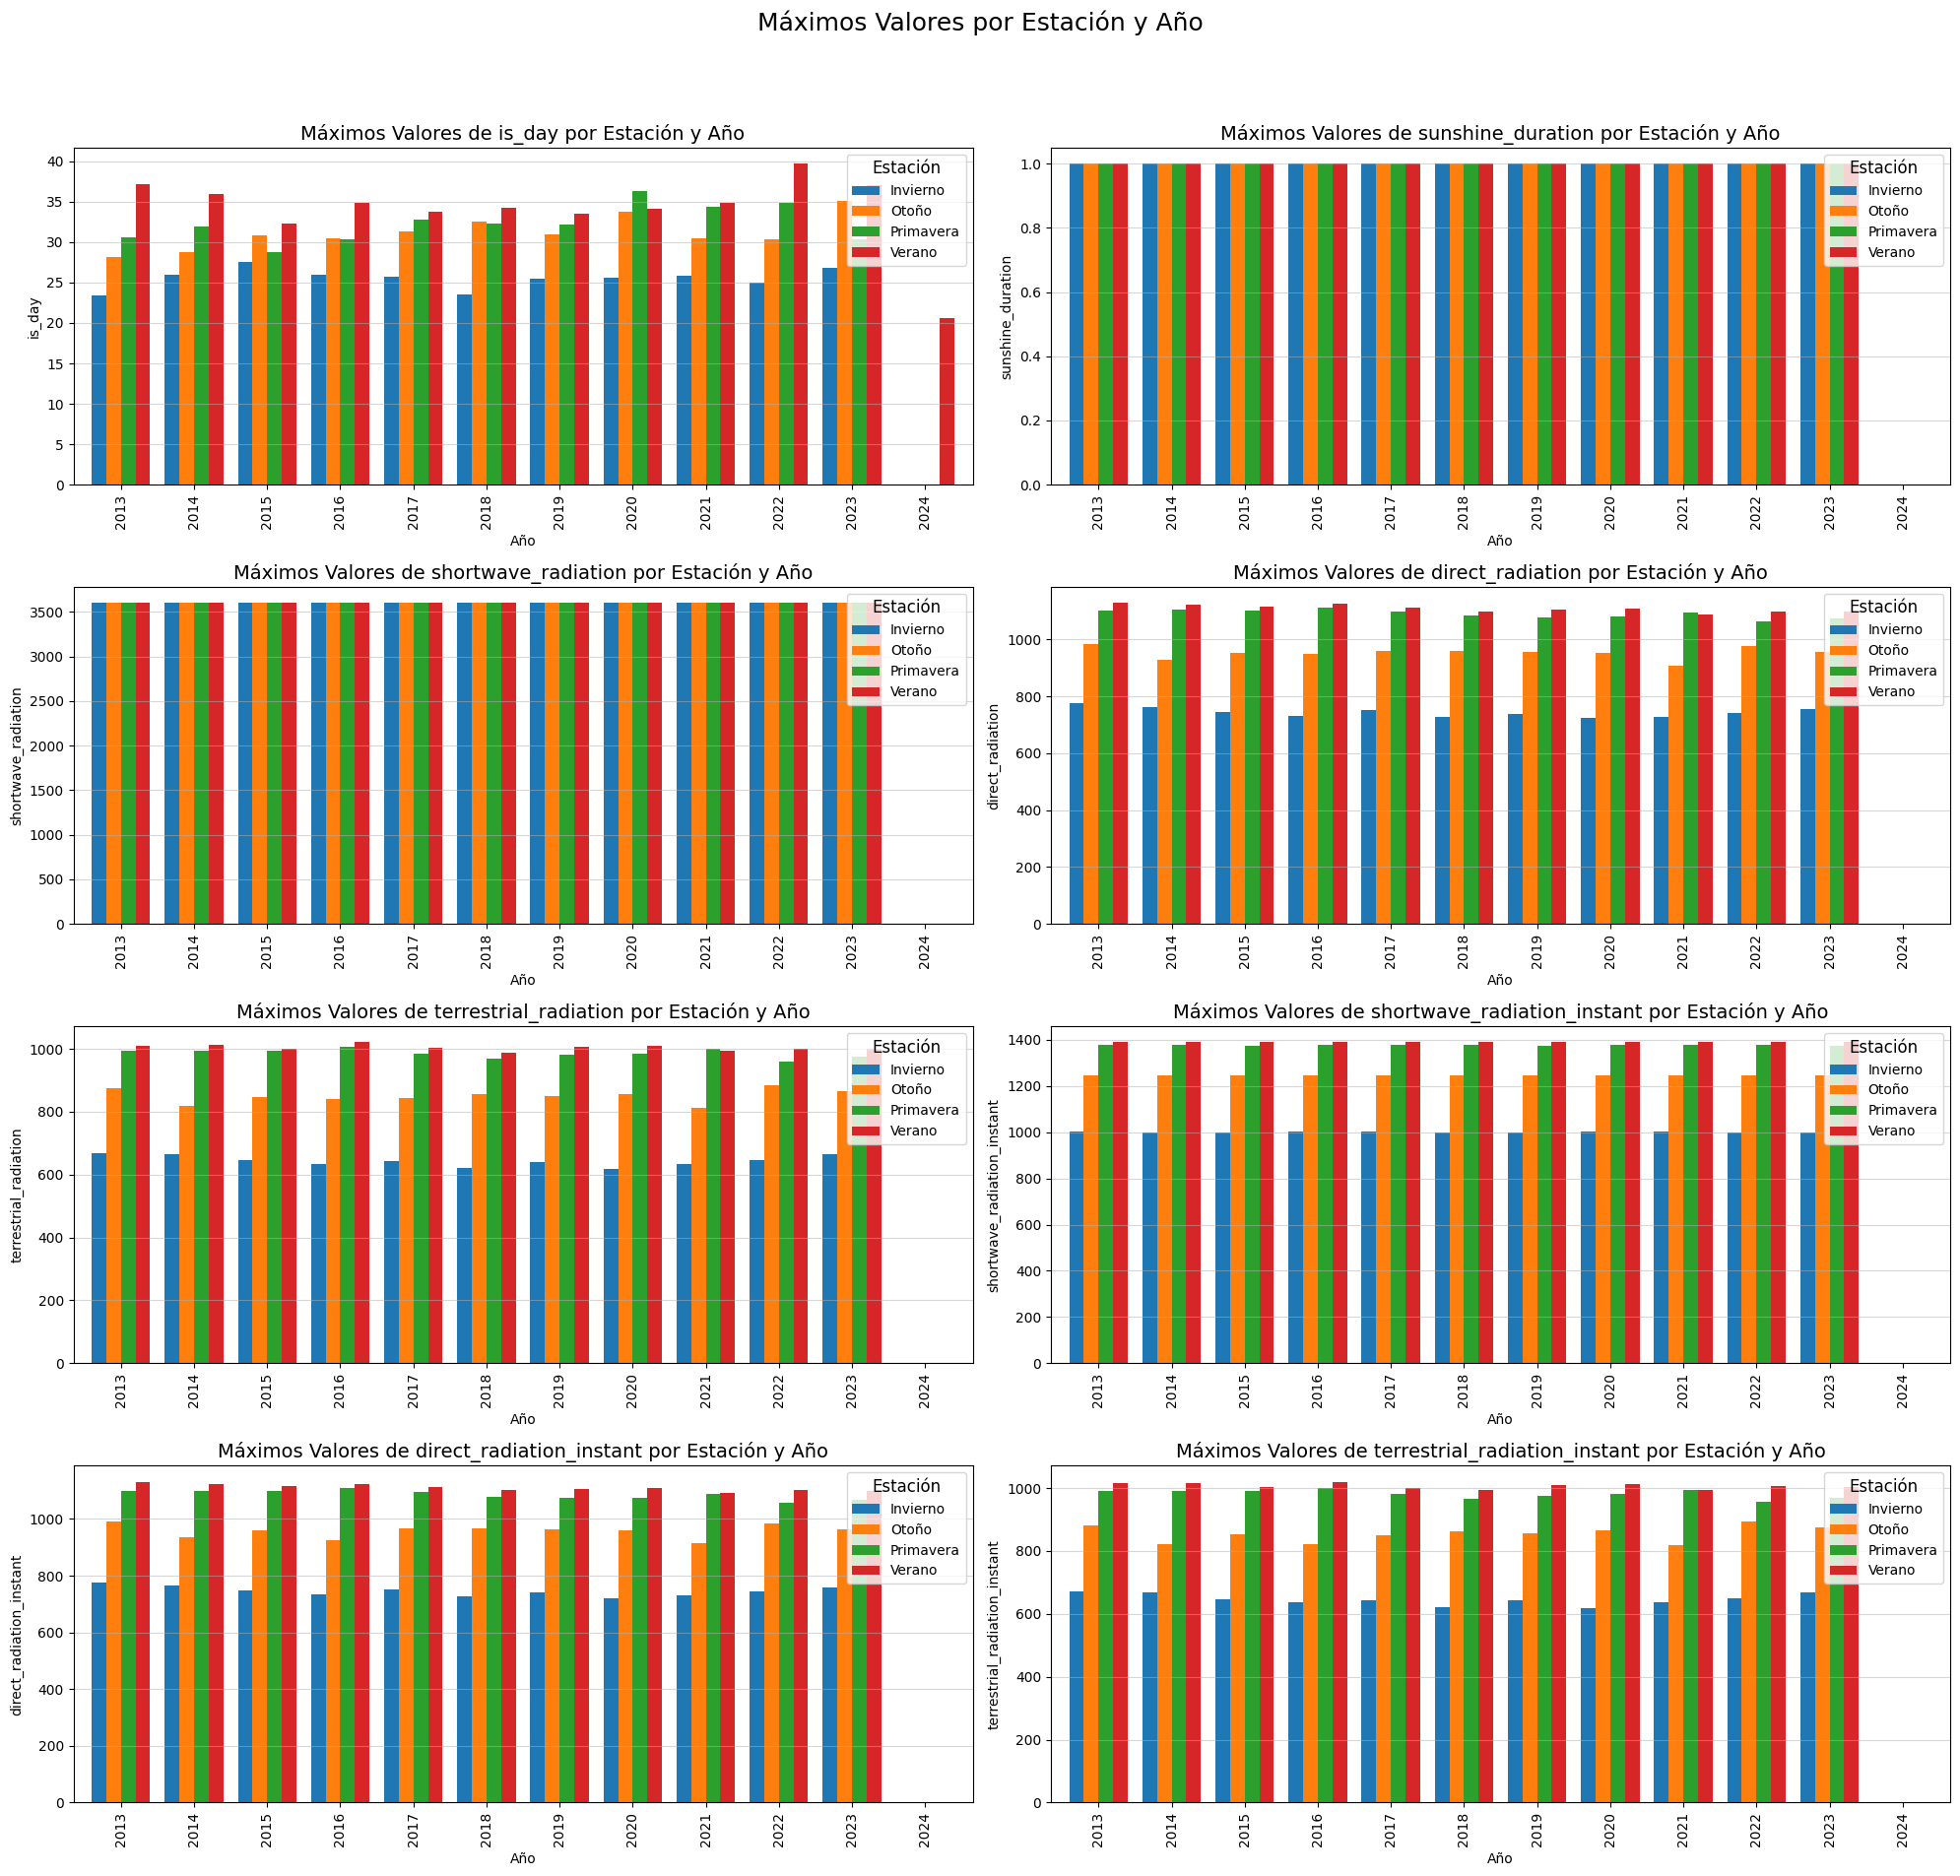

In [ ]:
# Crea una tabla pivot para sumarizar el valor máximo de cada variable por año y estación
max_values_by_season_year = data.pivot_table(
    values=[
        'is_day', 'sunshine_duration', 'shortwave_radiation', 'direct_radiation',
        'terrestrial_radiation', 'shortwave_radiation_instant',
        'direct_radiation_instant', 'terrestrial_radiation_instant'
    ],
    index='year',
    columns='season',
    aggfunc='max'
)

# Grafica el valor máximo utilizando gráficas de barras para cada variable y estación
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
fig.suptitle('Máximos Valores por Estación y Año', fontsize=18)

variables = [
    'is_day', 'sunshine_duration', 'shortwave_radiation', 'direct_radiation',
    'terrestrial_radiation', 'shortwave_radiation_instant',
    'direct_radiation_instant', 'terrestrial_radiation_instant'
]

# Grafica cada variable con su máximo valor en una gráfica de barras
for i, var in enumerate(variables):
    ax = axes[i // 2, i % 2]  # Determina la posición del subplot
    max_values_by_season_year[var].plot(kind='bar', ax=ax, width=0.8)
    ax.set_title(f'Máximos Valores de {var} por Estación y Año', fontsize=14)
    ax.set_xlabel('Año')
    ax.set_ylabel(var)
    ax.legend(title='Estación', fontsize=10, title_fontsize=12)
    ax.grid(axis='y', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


MAtriz de correlación de las variables

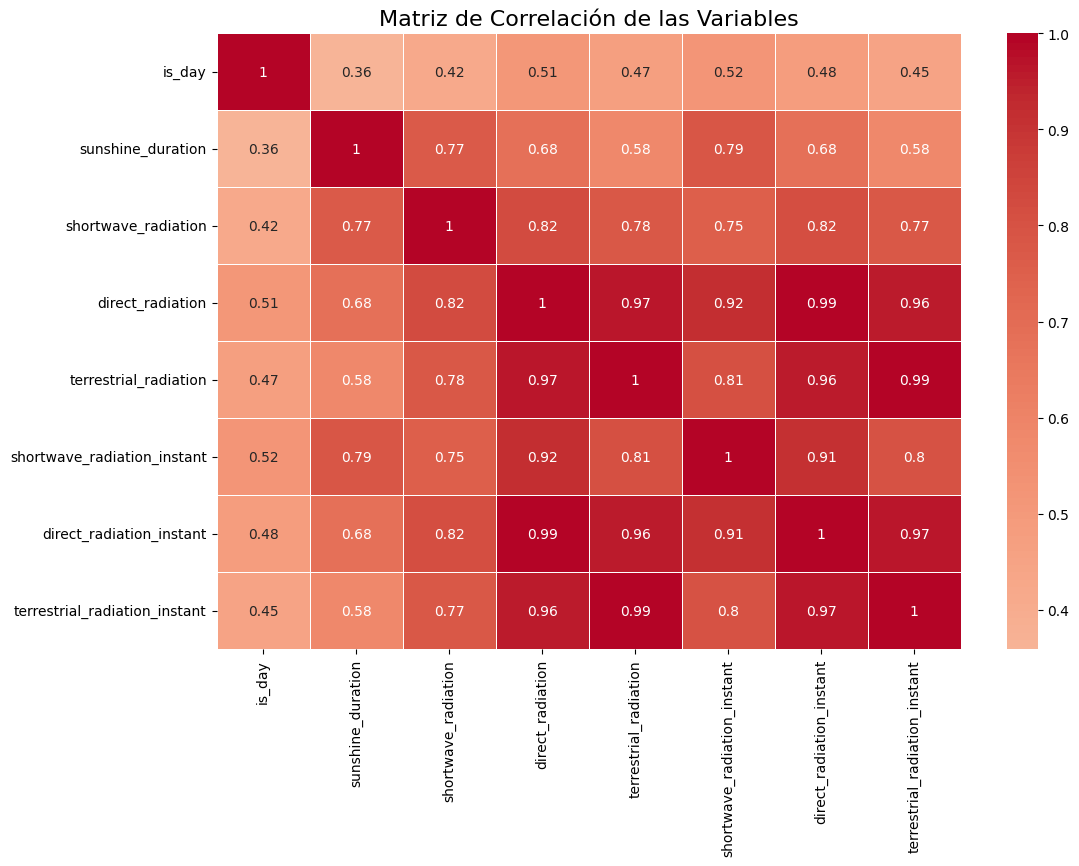

In [ ]:
import seaborn as sns

# Calcula la matriz de correlación para las variables numéricas
correlation_matrix = data[
    [
        'is_day', 'sunshine_duration', 'shortwave_radiation', 'direct_radiation',
        'terrestrial_radiation', 'shortwave_radiation_instant',
        'direct_radiation_instant', 'terrestrial_radiation_instant'
    ]
].corr()

# Grafica un mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Matriz de Correlación de las Variables', fontsize=16)
plt.show()


Estudio utilizando Boxsplot de la variable temperatura promedio por mes

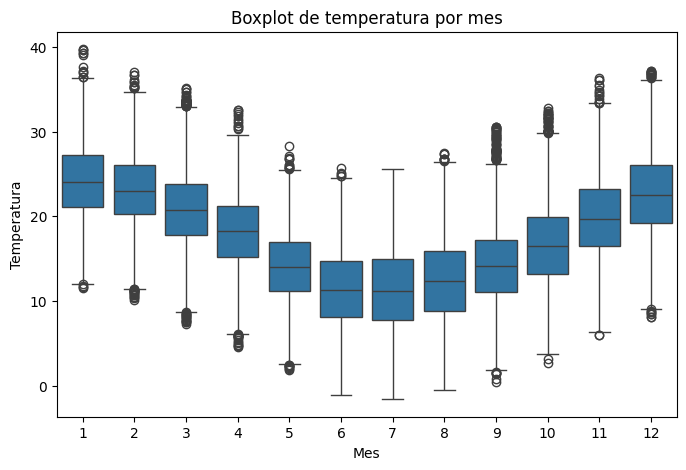

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["date"].dt.month, y=data["temperature"])
plt.title("Boxplot de temperatura por mes")
plt.xlabel("Mes")
plt.ylabel("Temperatura")
plt.show()

Estudio de la temperatura por hora del día utilizando Boxsplot

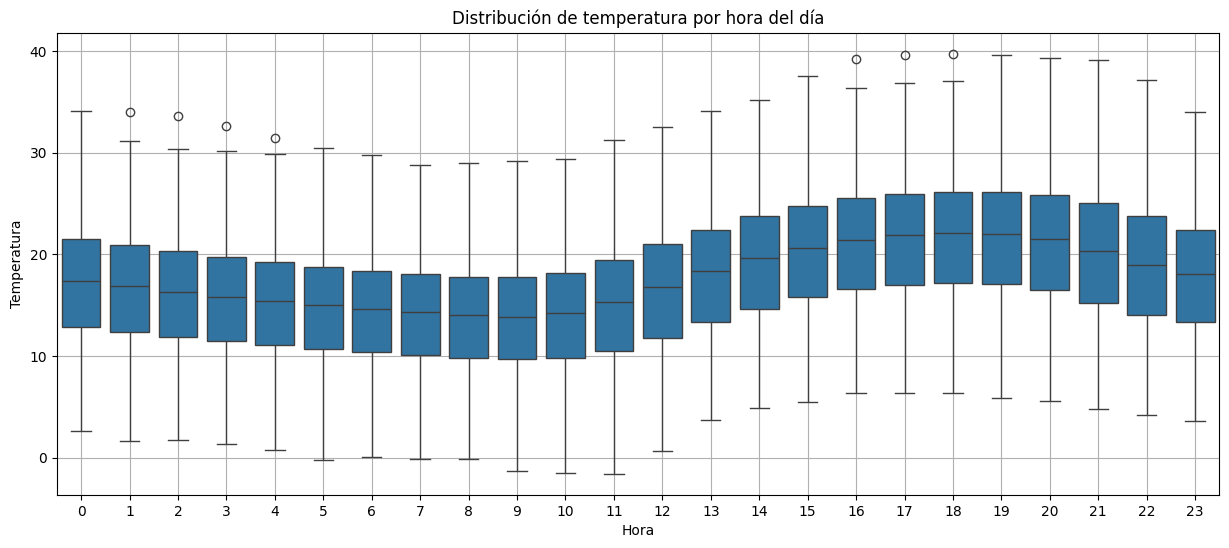

In [ ]:
# Extraer la hora si no está
if 'hour' not in data.columns:
    data['hour'] = data['date'].dt.hour

# Boxplot de temperatura por hora
if 'temperature' in data.columns:
    import seaborn as sns
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='hour', y='temperature', data=data)
    plt.title('Distribución de temperatura por hora del día')
    plt.xlabel('Hora')
    plt.ylabel('Temperatura')
    plt.grid(True)
    plt.show()

# Se guarda el resultado en datos procesados

In [ ]:
# Ruta local para guardar el archivo
save_path = os.path.join(desktop_path, "data/processed/datos_horarios_con_estacion.csv")

# Guardar el archivo CSV
data.to_csv(save_path, index=False)

print(f"Archivo guardado en: {save_path}")

Archivo guardado en: /Users/echalela/GitHub/SOLAR_LCOE_UY/data/processed/datos_horarios_con_estacion.csv
